In [81]:
from common import SparseGraph

In [82]:
class SsspContext:
    
    MAX_DISTANCE = 99999999999999999
    
    def __init__(self, g):
        self.pred = {} # 前驱结点
        self.distance ={} # 距离
        
        for k in g.V:
            v = g.V[k]            
            self.pred[v.v] = -1
            self.distance[v.v] = self.MAX_DISTANCE
        
    def __str__(self):
        s = '{\n'
        s += '    pred = %s\n' % str(self.pred)
        s += '    distance = %s\n' % str(self.distance)
        s += '}\n'
        
        return s

    
class SsspGraph(SparseGraph):
    
    def __init__(self):
        super(SsspGraph, self).__init__()
        
    def singleSourceShortest(self, s):
        s = self.findV(s)
        if s is None:
            return None
        
        context = SsspContext(self)        
        context.distance[s.v] = 0
        
        for i in range(len(self.V)):            
            for ukey in self.V:                
                u = self.V[ukey]

                v = u.next
                while v is not None:
                    w = v.weight
                    newLen = context.distance[u.v] + w

                    if newLen < context.distance[v.v]:
                        if i == len(self.V) - 1:
                            raise Exception("negative cycle!")

                        context.distance[v.v] = newLen
                        context.pred[v.v] = u.v

                    v = v.next
            
        return context

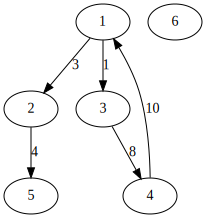

In [83]:
g = SsspGraph()
g.addV(1)
g.addV(2)
g.addV(3)
g.addV(4)
g.addV(5)
g.addV(6)

g.addE(1, 2, 3)
g.addE(1, 3, 1)
g.addE(3, 4, 8)
g.addE(4, 5, 2)
g.addE(2, 5, 4)
g.addE(4, 1, 10)

g.draw(True, True)

In [84]:
s = 1
context = g.singleSourceShortest(s)
print ('the shortest path from ' + str(s) + " is:")
print (context)

the shortest path from 1 is:
{
    pred = {1: -1, 2: 1, 3: 1, 4: 3, 5: 2, 6: -1}
    distance = {1: 0, 2: 3, 3: 1, 4: 9, 5: 7, 6: 99999999999999999}
}

